# Andere Visualisierungen

Bisher haben wir uns Visualisierung von Funktionen bzw. Funktionsdaten angesehen. Es gibt jedoch auch eine Reihe  anderer Daten und ihrer Visualisierung.


## Statistische Daten

Stastische Daten sind Daten mit Fehlern oder mit Wahrscheinlichkeiten. Damit kann man dann z.B. Fehlerplots oder Histogramme erstellen.

### Fehlerplots (errorbar)

Hat man Werte zusammen mit ihren Fehlerwerten, kann man errorbar benutzen

``` python
plt.errorbar(x,y, [xerr], [yerr])
```

- `xerr`: Fehler für x, kann ein Wert oder ein Array gleicher Größe wie x sein.
- `yerr`: Fehler für y, kann ein Wert oder ein Array gleicher Größe wie y sein.


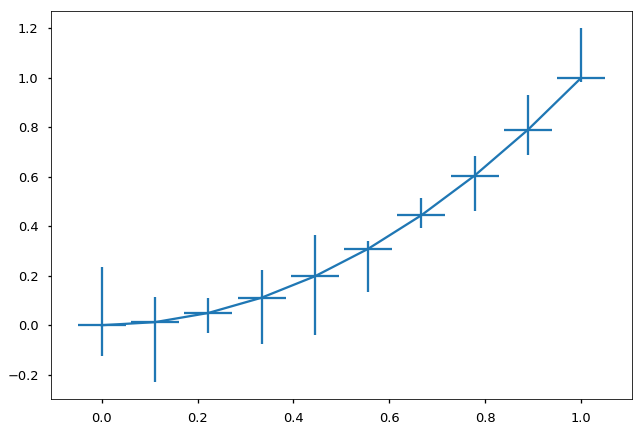

In [1]:
from numpy.random import random
from numpy import linspace
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')

N = 10
yerr = random((2,N))/4

x = linspace(0,1,N)
y = x**2 

plt.errorbar(x, y, xerr=0.05, yerr=yerr)
plt.show()

#### Fehlerplots (fill_between)

Eine schöne Möglichkeit Fehler darzustellen, falls man nur welche in $y$ hat ist die Funktion

``` python
plt.fill_between(x,y1,y2)
```
welche die Fläche zwischen y1 und y2 ausfüllt.


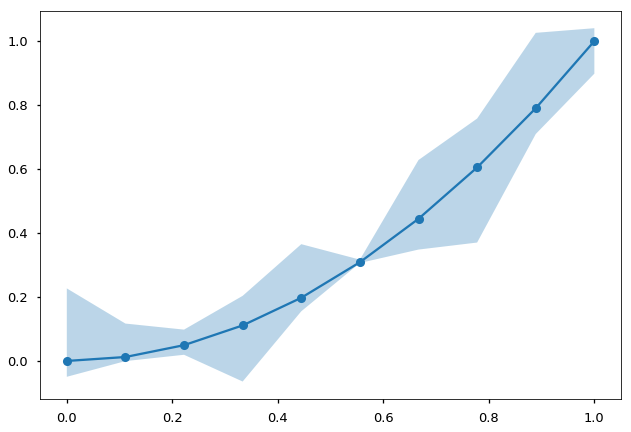

In [1]:
N = 10
yerr = random((2,N))/4

x = linspace(0,1,N)
y = x**2 

plt.plot(x,y,'o-')
plt.fill_between(x, y-yerr[0], y+yerr[1], alpha=0.3)
plt.show()

### Fehlerplots (violin/box)

einfach Fehlerplots (boxplots) stellen für gegebene (statistisch) verteilte Punkte den Mittelwert, die signifikante Box sowie den Fehlerbalken dar. 

```python
matplotlib.pyplot.boxplot(data, options)
```

wohingegen violin plots die gesamte Breite der Daten mittels integrierter Funktionen auf beiden Seiten darstellt.

```python
matplotlib.pyplot.violinplot(data, options)
```

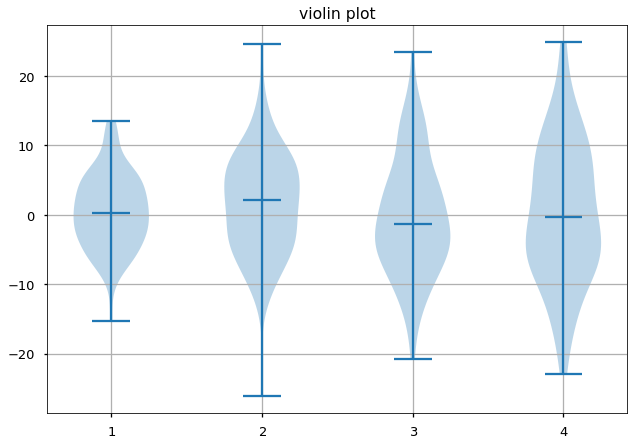

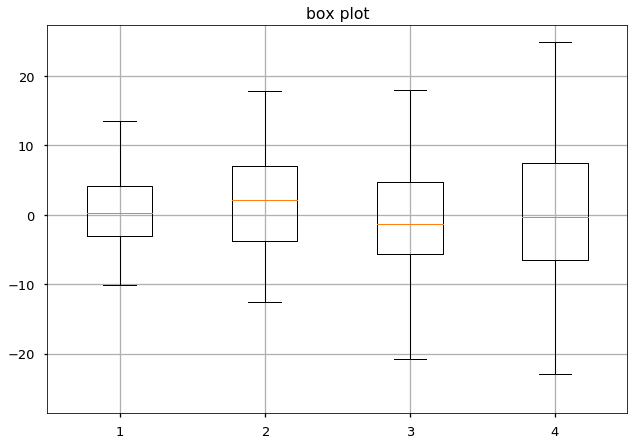

In [1]:
import matplotlib.pyplot as plt
from numpy import random

plt.style.use('seaborn-talk')

# Beispieldaten mit normalverteiltem Fehler
data = [random.normal(0, std, 100) for std in range(6, 10)]

# violin plot
plt.figure()
plt.violinplot(data, showmeans=False, showmedians=True)
plt.title('violin plot')
plt.grid(True)
plt.xticks([y+1 for y in range(len(data))])

# box plot
plt.figure()
plt.boxplot(data)
plt.title('box plot')
plt.grid(True)
plt.xticks([y+1 for y in range(len(data))])

plt.show()

### Histogramme

sind Balkendiagramme. Prinzipiell sehr ähnlich zu den x-y-Plots.

``` python
matplotlib.pyplot.hist(data, options)
```


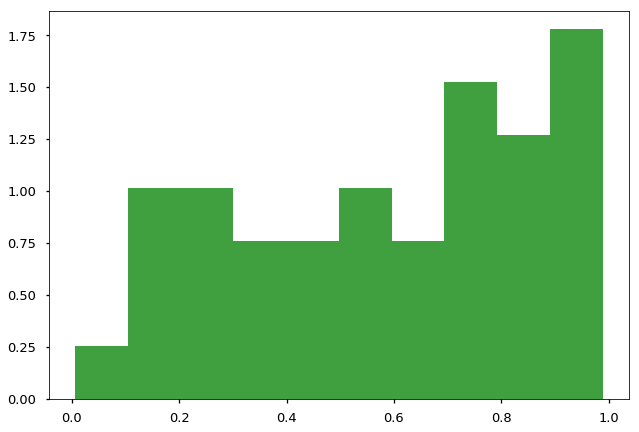

In [1]:
from scipy import rand
import matplotlib.pyplot as plt

n = 40
data = rand(n,1)
plt.hist(data, bins=10, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
plt.show()

### Geometrische Formen (Polygone)

Visualisierungen von geometrischen Objekten mittels *Polygone* also geschlossene Kurven über eine Punktmenge. Im Sinne der Darstellung brauchen wir dafür nur die bereits bekannte Funktion 


``` python
plt.plot(x,y)
```

weil sie einfach gegebene Punkte hintereinander verbindet. 

### Ausgefüllte Polygone

Ähnlich wie plot verbindet `fill` die Punkte mit Linien, verbindet dann zusätzlich aber den letzten punkt mit dem ersten und erhält damit eine geschlossen Kurve, die dann ausgefüllt wird.

``` python
plt.fill(x,y)
```

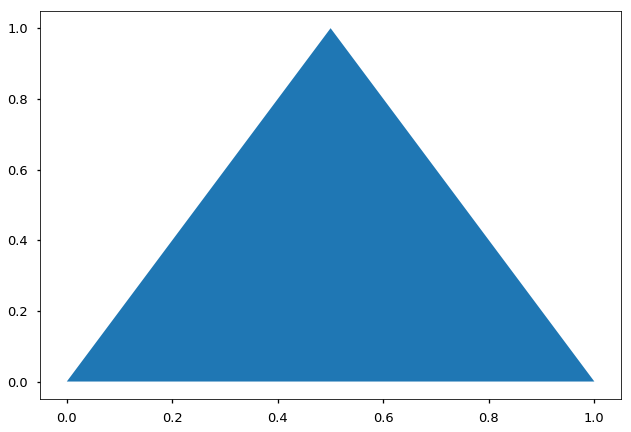

In [1]:
x=[0,1,0.5]
y=[0,0,1]

plt.fill(x,y)
plt.show()

**Beispiel: Sierpinski Dreieck**
- Wir beginnen mit einem Dreieck mit Eckpunkten $P_a$, $P_b$ und $P_c$. 
- Wir entfernen daraus das Dreieck, das durch die Mittelpunkte der
  Kanten entsteht.
- Die verbliebenden drei Dreiecke werden der gleichen Prozedur
  unterzogen.
- Diesen Prozess können wir rekursiv wiederholen.
- Das Ergebnis ist das Sierpinski Dreieck.

Ein Polygon sei durch die Eckpunkte $(x_i,y_i)_{i=1}^n$ gegeben. Dann
kann durch den Befehl
```python
matplotlib.pyplot.fill(x,y,char)
```
dargestellt werden. ```char``` gibt die Farbe des Polygons an, z.B. rot
wäre ```'r'```.

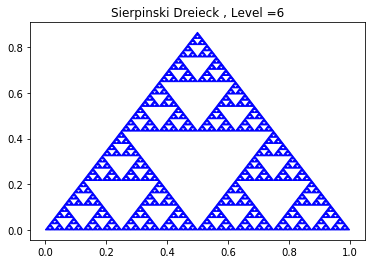

In [1]:
from numpy import array, sqrt
from itertools import chain
import matplotlib.pyplot as plt  

def sierpinski(ecke1,ecke2,ecke3,level):
    """Teilt ein Dreieck auf in 3 Dreiecke (level >0) 
    
    Parameters
    ----------
    ecke1: 2d array
        erste Ecke
    ecke2: 2d array
        zweiter Ecke
    ecke3: 2d array
        dritte Ecke
    level: int
        zu bearbeitende Levels
    
    Returns
    -------
    list:
        alle Punkte eines Dreiecks
    """
    liste = []
    if level == 0:
        return ([ecke1[0],ecke2[0],ecke3[0]],[ecke1[1],ecke2[1],ecke3[1]])
    else:
        ecke12 = (ecke1+ecke2)/2
        ecke13 = (ecke1+ecke3)/2
        ecke23 = (ecke2+ecke3)/2
        liste.append( sierpinski(ecke1, ecke12, ecke13, level-1) )
        liste.append( sierpinski(ecke12, ecke2, ecke23, level-1) )
        liste.append( sierpinski(ecke13, ecke23, ecke3, level-1) )
        return chain(*liste)
        
level = 6
ecke1 = array([0,0])
ecke2 = array([1,0])
ecke3 = array([0.5, sqrt(3)/2])

tripoints = sierpinski (ecke1 ,ecke2 ,ecke3 , level)

plt.figure()
plt.fill(*tripoints, color='b')
plt.title ('Sierpinski Dreieck , Level ={}'.format(level))
plt.show()

## Graphen

Eine weit verbreitete Struktur sind Graphen. Diese kann man auf schöne Weise visualisieren und wir benutzen dafür das modul `graph-tool`. 

``` python
import graph_tool as gt
```

Dies ist nicht in dem Standard-Satz "pnam" von python-programmen enthalten. Hier müsste man die nix-shell wie folgt aufrufen:

``` python
nix-shell -p python3Packages.pnam python3Packages.graph-tool
```

um nicht unseren *namespace* zu stark zu beinträchtigen, importieren wir nur die Funktionalität, die wir benötigen.


In [1]:
from graph_tool import Graph

Dann erzeugen wir ein (leeres) Graph-Objekt

In [1]:
g = Graph()

Dann fügen wir erst einmal *Knoten* hinzu. Ein Knoten ist im Englisch ein *vertex*

``` python
g.add_vertex([<anzahl>])
```

Beispielhaft machen wir mal 4 Knoten, die jeweils Namen 'A' bis 'D' haben.

In [1]:
g.add_vertex(4)

<generator object Graph.add_vertex.<locals>.<genexpr> at 0x7f0e195d8af0>

Jetzt wollen wir den Knoten Eigenschaften hinzufügen und diese auch mit Darstellen.
Dafür gibt es sogenannte *properties*.

``` python
g.new_vertex_property(<typ>)
```

wobei <typ> z.B.

* string
* double
* bool


In [1]:
knoten = ['A','B','C','D']

v_name = g.new_vertex_property("string")

for idx,kn in enumerate(knoten):
    v_name[g.vertex(idx)] = kn

Dann fügen wir diese property noch dem Graphen-Objekt hinzu. Damit können wir leichter darauf zugreifen und es wird auch mit abgespeichert. 

In [1]:
g.vertex_properties["names"] = v_name

Damit haben wir einen einfachen Graph erstellt. Jetzt wollen wir ihn darstellen; das geht mit
``` python
graph_tool.draw.graph_draw(<graph>)
```

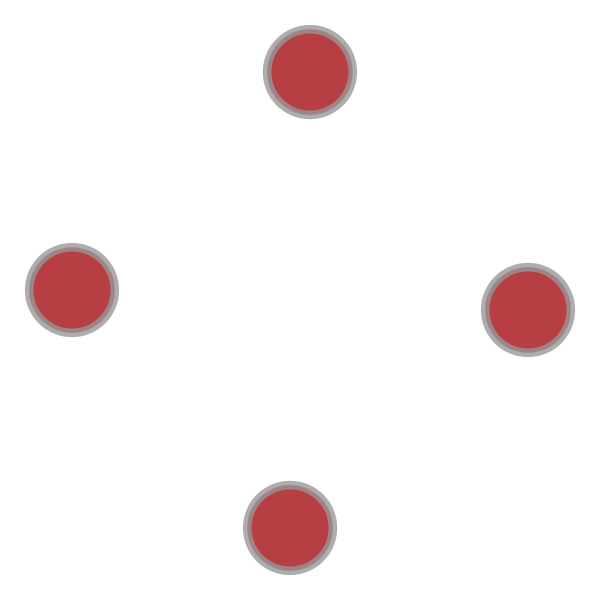

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0e1917f400, at 0x7f0e1aecceb8>

In [1]:
from graph_tool.draw import graph_draw
graph_draw(g)

Diese Eigenschaften der vertices wollen wir jetzt auch in der Grafik sehen. Dafür benutzt man das optionale Argument

``` python
vertext_text = <propertymap> 
```
an die graph_draw Funktion


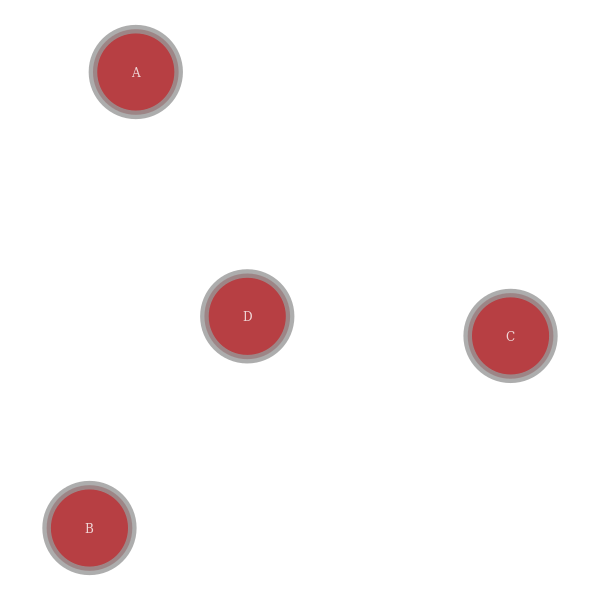

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0e1917f400, at 0x7f0e1aebd860>

In [1]:
graph_draw(g, vertex_text=g.vp.names)

Jetzt fügen wir Kanten (*edges*) hinzu.

``` python
g.add_edge(<vertex1>,<vertex2>)
```

In [1]:
kanten = [(0,1),(0,2),(0,3),(1,3)]

for ka in kanten:
    e =  g.add_edge(g.vertex(ka[0]), g.vertex(ka[1]))

Wir wollen auch Gewichte für die Kanten haben. Dazu nutzen wir 

``` python
g.new_edge_property(<typ>)
```

fügen das wie die properties für die vertices dem Graphen hinzu. 
Dann nutzen wir die Möglichkeit über Attribute vom Graphen direkt auf die Gewichte zuzugreifen und sie als Array zu setzen.

In [1]:
from numpy.random import randint
g.edge_properties["weights"] = g.new_edge_property("int")
g.ep.weights.a = randint(0,100,g.num_edges())

Die Gewichte der Kanten wollen wir jetzt auch in der Grafik darstellen. Dafür bentutzt man das optionale Argumente

``` python
edge_text = <propertymap>
```

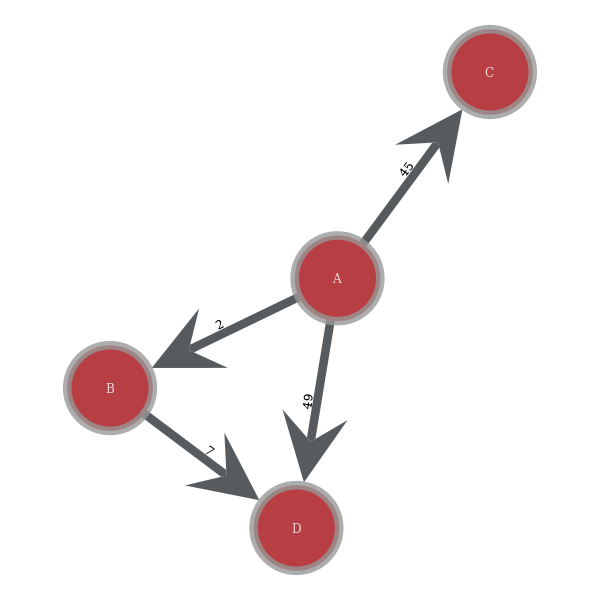

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0e1917f400, at 0x7f0e1b181320>

In [1]:
graph_draw(g, vertex_text=g.vp.names, edge_text=g.ep.weights)

Jetzt ist die Visualisierung der Kanten noch nicht gut an ihre Gewichte angepasst. Dafür verwenden wir ein 

``` python
sfdp_layout(<graph>, [eweight=<edge_properties>])
```

In [1]:
from graph_tool.draw import sfdp_layout  
pos = sfdp_layout(g, eweight=g.ep.weights)

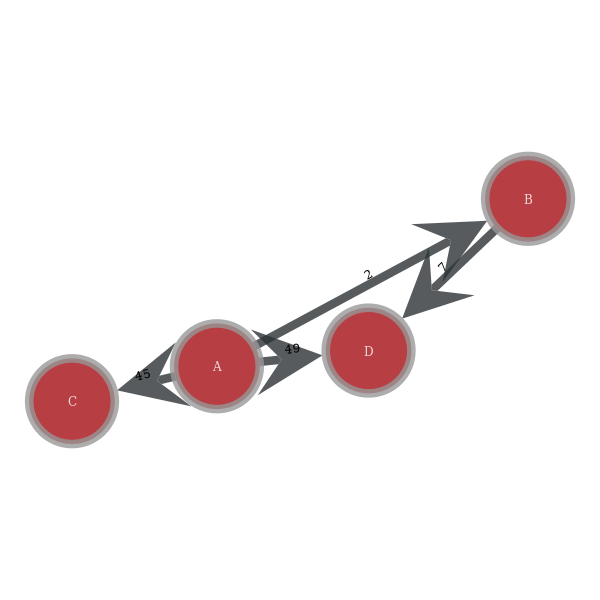

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0e1917f400, at 0x7f0e1b181d30>

In [1]:
graph_draw(g, vertex_text=g.vp.names, edge_text=g.ep.weights, pos=pos)

### Matrix = Graph?

Wir könnenn einen Graph als Matrix darstellen und vice versa. Eine Möglichkeit ist eine *Adjazenzmatrix*:
Mit $N$ Knoten ist das eine $N\times N$ Matrix deren Einträge die Kanten-stärke und Richtung angibt. Ein 0-Eintrag entspricht keiner Kante.

$$
a_{ij} = 
\begin{cases}
w_{ij} & \text{falls} (i,j) \in E\\
0 & \text{sonst}
\end{cases}
$$

Wir erzeugen uns aus unseren Daten von oben diese Matrix

In [1]:
N = 4
kanten = [(0,1),(0,2),(0,3),(1,3)]

from numpy import zeros
from numpy.random import randint

A = zeros((N,N))
for kante in kanten:
    A[kante[0],kante[1]] = randint(0,100)
A

array([[  0.,  57.,  81.,  93.],
       [  0.,   0.,   0.,  86.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.]])

nun möchten wir eine Funktion schreiben, die aus so einer Matrix einen Graphen erstellt.

In [1]:
def matrix2graph(A):
    g = Graph()
    N = A.shape[0]
    g.add_vertex(N)
    g.edge_properties["weights"] = g.new_edge_property("int")
    nn = A.nonzero() # das findet die indizes von allen 0-Einträgen der Matrix
    for i,j in zip(nn[0],nn[1]):
        e =  g.add_edge(g.vertex(i), g.vertex(j))
        g.ep.weights[e] = A[i,j]
    return g

Damit erzeugen wir aus unserer Matrix $A$ von oben den dazugehörigen Graph

In [1]:
gm = matrix2graph(A)

Und stellen ihn dar

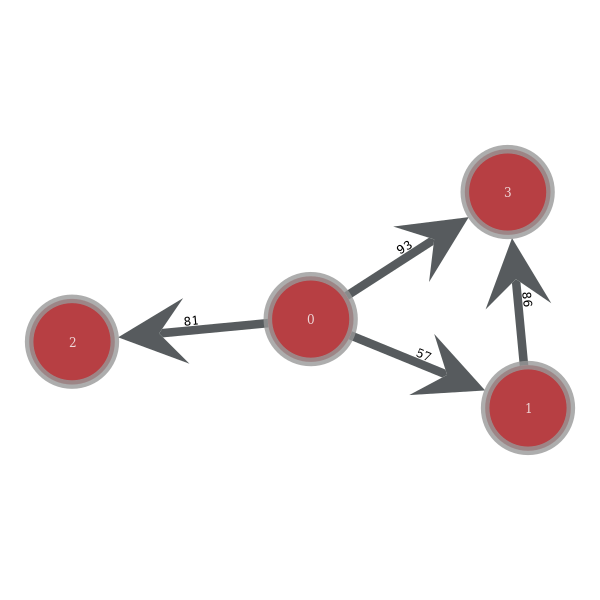

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0e1aea7b70, at 0x7f0e1aea3908>

In [1]:
graph_draw(gm, vertex_text=gm.vertex_index, edge_text=gm.ep.weights)